In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.autograd import Variable


In [2]:
import librosa
import librosa.display

filename = 'sample_data/audio/01.wav'
scale, sr = librosa.load(filename)
sr = 22050
window_size = 25
stride = 10
input_dim = 40
ws = int(sr * 0.001 * window_size)
st = int(sr * 0.001 * stride)
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_mels = input_dim, n_fft=ws, hop_length=st)
mel_spectrogram = np.log(mel_spectrogram + 1e-6)

In [3]:
mel_spectrogram =  torch.from_numpy(mel_spectrogram)
mel_spectrogram.shape

torch.Size([40, 359])

In [4]:
from importlib import reload
import network.sed
import network.sen
reload(network)

<module 'network' from 'c:\\Users\\tomas\\Documents\\DSAI\\SS21\\HLCV\\Project\\HLCV-Project-Facial-Image-Generation-from-Speech-Input-using-GAN\\network\\__init__.py'>

In [5]:
sed = network.sed.SED()
linear = network.sen.Linear_Encoder()
sen = network.sen.Inception_V3_Model()

C:\Users\tomas\anaconda3\lib\site-packages\torchvision\models\inception.py:80: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn('The default weight initialization of inception_v3 will be changed in future releases of '
Loading pre-trained model from  https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth


C:\Users\tomas\anaconda3\lib\site-packages\torchvision\transforms\transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


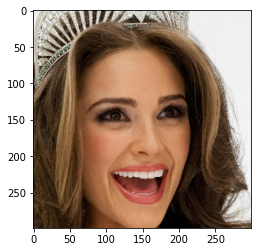

In [6]:
import torchvision.transforms.functional as TF
from torchvision import transforms
image = Image.open('preprocess/mmca/images/0.jpg')
p = transforms.Compose([transforms.Scale((299,299))])
x = p(TF.to_tensor(image))
plt.imshow(x.permute(1, 2, 0))

In [7]:
image_output = sen(x.unsqueeze(0))
audio_output = sed(mel_spectrogram.unsqueeze(0))

In [8]:
image_output.shape

torch.Size([1, 1024])

In [75]:
from importlib import reload
import datasets.mmca
reload(datasets.mmca)

<module 'datasets.mmca' from 'c:\\Users\\tomas\\Documents\\DSAI\\SS21\\HLCV\\Project\\HLCV-Project-Facial-Image-Generation-from-Speech-Input-using-GAN\\datasets\\mmca.py'>

In [76]:
dataset = datasets.mmca.ImageDataset(data_dir = "preprocess/mmca/images")

In [77]:
dataset.image_data[0][0]

tensor([[[ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
         [ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
         [ 0.8824,  0.8824,  0.8824,  ...,  0.8667,  0.8745,  0.8745],
         ...,
         [-0.6650, -0.5659, -0.5583,  ..., -0.4435, -0.3690, -0.4297],
         [-0.6126, -0.4200, -0.5196,  ...,  0.1967, -0.0516,  0.1055],
         [-0.3880, -0.5282, -0.2247,  ..., -0.2664, -0.2010, -0.1573]],

        [[ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
         [ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
         [ 0.8824,  0.8824,  0.8824,  ...,  0.8667,  0.8745,  0.8745],
         ...,
         [-0.8140, -0.7150, -0.7073,  ..., -0.6078, -0.5338, -0.5947],
         [-0.7538, -0.5612, -0.6608,  ...,  0.0242, -0.2242, -0.0670],
         [-0.5291, -0.6694, -0.3659,  ..., -0.4513, -0.3859, -0.3422]],

        [[ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
         [ 0.8824,  0.8824,  0.8824,  ...,  0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


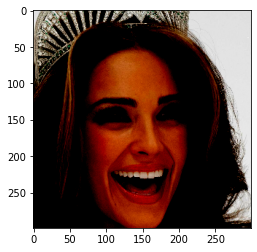

In [31]:
plt.imshow(dataset.image_data[0][0].permute(1, 2, 0))